### Stock Prediction using LSTM

In [ ]:
# Importing and Accessing the dataset
import pandas_datareader as pdr
import pandas as pd
data = pdr.get_data_tiingo('AAPL',api_key='84937a949bc6030792d317054c54af8fedc1c968')
data.to_csv('AAPL.csv')
data = pd.read_csv('AAPL.csv')
data.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-12-08 00:00:00+00:00,112.12,112.43,110.60,110.86,27068316,26.380961,26.453902,26.023317,26.084493,108273264,0.0,1.0
1,AAPL,2016-12-09 00:00:00+00:00,113.95,114.70,112.31,112.31,34402627,26.811546,26.988015,26.425667,26.425667,137610508,0.0,1.0
2,AAPL,2016-12-12 00:00:00+00:00,113.30,115.00,112.49,113.29,26374377,26.658606,27.058603,26.468019,26.656253,105497508,0.0,1.0
3,AAPL,2016-12-13 00:00:00+00:00,115.19,115.92,113.75,113.84,43733811,27.103308,27.275071,26.764487,26.785664,174935244,0.0,1.0
4,AAPL,2016-12-14 00:00:00+00:00,115.19,116.20,114.98,115.04,34031834,27.103308,27.340953,27.053897,27.068014,136127336,0.0,1.0


In [ ]:
data.shape

(1257, 14)

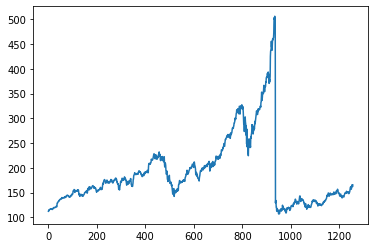

In [ ]:
df_close = data['close']

# ploting the close feature in stocks
import matplotlib.pyplot as plt
plt.plot(df_close)

In [ ]:
# chosing size of train and test set
training_size=int(len(df_close)*0.8)
test_size = len(df_close)-training_size

# Segregating the dataset into train and test
training_data,test_data =data.iloc[0:training_size,2:3].values,data.iloc[training_size:len(df_close),2:3].values

# Normalizing the dataset
import numpy as np
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
scaled_train_data=sc.fit_transform(training_data)
scaled_train_data

array([[0.0132248 ],
       [0.01780839],
       [0.01618034],
       ...,
       [0.04067627],
       [0.04032561],
       [0.03859737]])

In [ ]:
# Creating x & y train for training data
X_train,y_train = [],[]
for i in range(60,len(scaled_train_data)):
  X_train.append(scaled_train_data[i-60:i,0])
  y_train.append(scaled_train_data[i,0])

# Converting into numpy array
X_train=np.array(X_train)
y_train=np.array(y_train)  

# Reshaping the data
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
print(X_train.shape,y_train.shape)

(945, 60, 1) (945,)


In [ ]:
# Building the LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout
regressor_model=Sequential()
regressor_model.add(LSTM(50,input_shape=(X_train.shape[1],1),return_sequences=True))
regressor_model.add(Dropout(0.2))

regressor_model.add(LSTM(50,return_sequences=True))
regressor_model.add(Dropout(0.2))

regressor_model.add(LSTM(50,return_sequences=True))
regressor_model.add(Dropout(0.2))

regressor_model.add(LSTM(50))
regressor_model.add(Dropout(0.2))

regressor_model.add(Dense(1))

# Fitting the model
regressor_model.compile(optimizer='adam',loss='mean_squared_error')
regressor_model.fit(X_train,y_train,batch_size=64,epochs=100)

#saving the model
regressor_model.save('apple_train_stock.model')

Epoch 1/100
15/15 [==============================] - 11s 63ms/step - loss: 0.0302
Epoch 2/100
15/15 [==============================] - 1s 64ms/step - loss: 0.0130
Epoch 3/100
15/15 [==============================] - 1s 63ms/step - loss: 0.0095
Epoch 5/100
15/15 [==============================] - 1s 62ms/step - loss: 0.0077
Epoch 6/100
15/15 [==============================] - 1s 63ms/step - loss: 0.0083
Epoch 7/100
15/15 [==============================] - 1s 63ms/step - loss: 0.0074
Epoch 8/100
15/15 [==============================] - 1s 62ms/step - loss: 0.0066
Epoch 9/100
15/15 [==============================] - 1s 62ms/step - loss: 0.0067
Epoch 10/100
15/15 [==============================] - 1s 62ms/step - loss: 0.0063
Epoch 11/100
15/15 [==============================] - 1s 62ms/step - loss: 0.0059
Epoch 12/100
15/15 [==============================] - 1s 62ms/step - loss: 0.0057
Epoch 13/100
15/15 [==============================] - 1s 62ms/step - loss: 0.0049
Epoch 14/100
15/15 [===

INFO:tensorflow:Assets written to: apple_train_stock.model/assets


INFO:tensorflow:Assets written to: apple_train_stock.model/assets


In [ ]:
# preparing the test data
inputs = data.iloc[len(data)-test_size-60:,2:3].values
inputs=inputs.reshape(-1,1)
scaled_inputs=sc.transform(inputs)
X_test=[]
for i in range(60,len(scaled_inputs)):
  X_test.append(scaled_inputs[i-60:i,0])

X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

# Predicting the model
pred_y=regressor_model.predict(X_test)

# Transform back to orginal form
pred_y=sc.inverse_transform(pred_y)
print(pred_y.shape)

# Calculate RMSE performance metrics
rmse = np.sqrt(np.mean((np.array(test_data)-pred_y)**2))
print(rmse)

(252, 1)
5.231234334728682


In [ ]:
# comparing pred data with actual data
print(np.concatenate((pred_y,test_data),1)[0:10])

[[124.21576691 123.75      ]
 [124.7873764  124.38      ]
 [125.41890717 121.78      ]
 [126.03253937 123.24      ]
 [126.58299255 122.41      ]
 [127.03816986 121.78      ]
 [127.37562561 127.88      ]
 [127.67700195 127.81      ]
 [128.0181427  128.7       ]
 [128.4445343  126.655     ]]


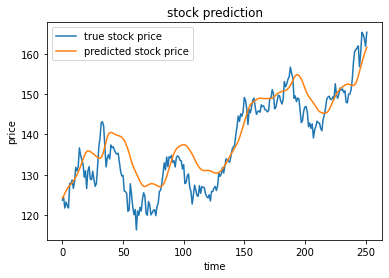

In [ ]:
# Plotting 
plt.plot(test_data,label='true stock price')
plt.plot(pred_y,label='predicted stock price')
plt.title('stock prediction')
plt.xlabel('time')
plt.ylabel('price')
plt.legend(loc='upper left')

# saving the plot
plt.savefig('price prediction.png')

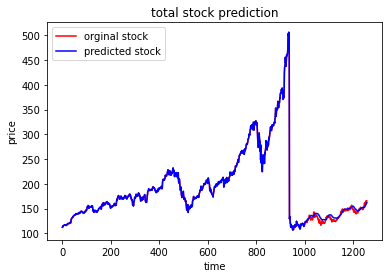

In [ ]:
# comparision of orginal stock to predited stock
df_close = data['close']
y_pred=pd.DataFrame(columns=['close'],data=pred_y)
df_stock= np.concatenate((data['close'][0:training_size],y_pred['close']),axis=0)

# ploting the close feature in stocks
plt.plot(df_close,color='red',label='orginal stock')
plt.plot(df_stock,color='blue',label='predicted stock')
plt.title('total stock prediction')
plt.xlabel('time')
plt.ylabel('price')
plt.legend(loc='upper left')

# saving the plot
plt.savefig('stock prediction.png')